**The problems in this assignment are sequential. There is no need to load finance_data or text_data from the CSV files for each question.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# read finance data from csv
finance_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/finance_data.csv')
# read text data from csv
text_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/text_data.csv')

# look at the data sample
finance_data.head()
text_data.head()

,ticker,year,quarter,total_word_count,neg,neu,pos,compound
0,SWKS,2022,q1,5408,0.013799,0.794847,0.191359,0.266350
1,CVS,2022,q1,7238,0.011254,0.823173,0.165576,0.294958
2,VNO,2022,q1,8400,0.014297,0.881848,0.103842,0.185106
3,BMY,2022,q1,8107,0.012447,0.816974,0.170585,0.266373
4,LVS,2022,q1,4458,0.021880,0.787235,0.190891,0.206733


**Question 1: If a row in finance_data has null sic_two_digit, that means the financial data could not be effectively extracted from the database. Write code to remove the rows in finance_data if sic_two_digit is null.**

In [ ]:
finance_data.dropna(subset=['sic_two_digit'], inplace = True)

**Question 2: After we describe the data, we notice that the revenue column has remaining null values. Write code to fill the null values in revenue with the average of non-null revenue values.**

In [ ]:
finance_data['revenue'].fillna(finance_data['revenue'].mean(), inplace = True)

**Question 3: After further examination of the data, we find that there is a wrong entry in the ticker column. Write code to replace the ticker which equals 'BFB' to 'BF.B' in text_data.**

In [ ]:
text_data.loc[text_data['ticker'] == 'BFB', 'ticker'] = 'BF.B'

**Question 4: Write code to identify the row(s) in text_data whose ticker is not in finance_data.**

In [ ]:
missing_tickers = text_data[~text_data['ticker'].isin(finance_data['ticker'])]

**Question 5: Write code to merge finance_data and text_data on three columns: ticker, year, and quarter. Name the merged DataFrame "merged_data".**

*Hint: If two rows in finance_data and text_data have equal values on all of the three fields (i.e., ticker, year, and quarter), we merge the rows.*

In [ ]:
merged_data = pd.merge(finance_data, text_data, on=['ticker', 'year', 'quarter'])

**Question 6: Write code to count the number of rows for each unique sic_two_digit in merged_data**

In [ ]:
sic_counts = merged_data['sic_two_digit'].value_counts()

**Question 7: Add a new column labeled as industry to merged_data. If sic_two_digit is 36, industry equals 'Electronics'. If sic_two_digit is 28, industry equals 'Chemicals'. If sic_two_digit is 73, industry is 'Business Services'. For other sic_two_digit values, industry is 'Others'**

In [ ]:
merged_data['industry'] = merged_data['sic_two_digit'].map({
    36: 'Electronics',
    28: 'Chemicals',
    73: 'Business Services'
}).fillna('Others')

**Question 8: Write code to answer the following question: for each industry (i.e., Electronics, Chemicals, Business Services and Others), what is the average revenue and average total_word_count?**

In [ ]:
industry_summary = merged_data.groupby('industry')[['revenue', 'total_word_count']].mean().reset_index()

In [ ]:
print(industry_summary)

            industry       revenue  total_word_count
0  Business Services   3110.753300       6324.900000
1          Chemicals   7030.797091       7960.545455
2        Electronics   4168.828833       7508.166667
3             Others  10315.005588       7438.378788


**Question 9: Write code to answer the following question: what is the correlation between a company's return on asset and its compound sentiment score?**

*Hint: Return on asset is net income divided by total assets.*

In [ ]:
merged_data['ROA'] = merged_data['net_income'] / merged_data['total_assets']
correlation = merged_data['ROA'].corr(merged_data['compound'])

In [ ]:
print(correlation)

0.02453846625820225


**Question 10: Plot a scatter plot with return on asset and compound sentiment score on the x-axis and y-axis, respectively. Explain the pattern that you see in the plot.**

In [ ]:
import matplotlib.pyplot as plt

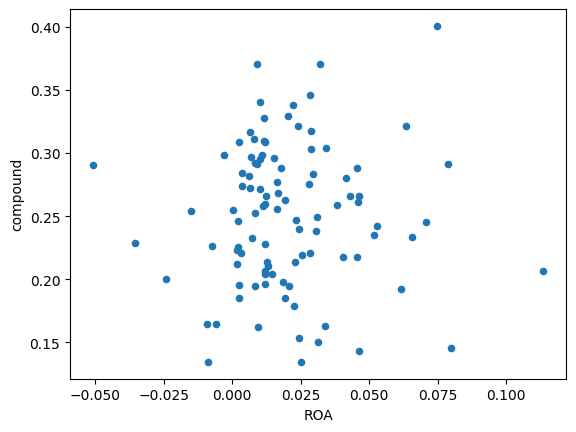

In [ ]:
merged_data['ROA'] = merged_data['net_income'] / merged_data['total_assets']
merged_data.plot(kind = 'scatter', x = 'ROA', y = 'compound')
plt.show()

I did not use any generative AI technologies for completing this deliverable.